In [2]:
#pip install geopandas

In [10]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Concatenate all files into dataframe

In [1]:
import os
import pandas as pd

# Set the directory path
dir_path = ".../street_data"


# read all files into dataframe
def read_files(path):
     List all CSV files in the directory
    file_names = [f for f in os.listdir(path) if f.endswith('.csv')]
     Read each CSV file into a separate dataframe
    dfs = []
    for file_name in file_names:
        file_path = os.path.join(path, file_name)
        df1 = pd.read_csv(file_path)
        dfs.append(df1)
        Concatenate all dataframes into a single dataframe
    df_combined = pd.concat(dfs, ignore_index=True)
    return df_combined


df = read_files(dir_path)

In [ ]:
df.head()

In [ ]:
# Only using the data with location
df = df[df['Location'] != 'No Location']

In [ ]:
sum(df['Crime type'].isnull())

In [ ]:
sns_path = "C:/Users/xiaoyawang/Documents/DC 2/stop-and-search_data"
df_search = read_files(sns_path)

## Store the Outcome files to SQL db

In [ ]:
# Set the Outcomes files directory path
outcomes_path = "C:/Users/xiaoyawang/Documents/DC 2/outcomes_data"

In [ ]:
df_outcomes = read_files(outcomes_path)

In [ ]:
df_outcomes

In [ ]:
# Only using the data with location
df_outcomes = df_outcomes[df_outcomes['Location'] != 'No Location']

## Store the dataframe with crime type Burglary into SQL database

In [ ]:
# dataframe with crime type Burglary
df_burg = df[df['Crime type'] == 'Burglary']
df_burg

In [ ]:
# store the dataframe into a database
from sqlalchemy import create_engine

# Connect to a SQL database
engine = create_engine('sqlite:///crime_data.db', echo=False)
# Write the dataframe to the database
df_burg.to_sql('all_burg', con=engine, if_exists='replace', index=False)

# Close the database connection
engine.dispose()

In [ ]:
## Plots for burglary
df_burg['Month'] = pd.to_datetime(df_burg['Month']).dt.to_period('M')
df_burg['dt_year'] = df_burg['Month'].dt.year
df_burg['dt_month'] = df_burg['Month'].dt.month

In [ ]:
burg_year = df_burg.groupby('dt_year')[['Crime type']].count()
burg_year = burg_year.rename(columns={'Crime type':'burglary counts'})
burg_month = df_burg.groupby('dt_month')[['Crime type']].count()
burg_month = burg_month.rename(columns={'Crime type':'burglary counts'})
burg_time = df_burg.groupby('Month')[['Crime type']].count()
burg_time = burg_time.rename(columns={'Crime type':'burlary counts'})


In [ ]:
burg_time.plot(kind='line',figsize=(5, 3))

In [ ]:
burg_year.plot(kind='line',figsize=(5, 3))

In [ ]:
burg_month.plot(kind='line',figsize=(5, 3))

## Dataframe for Barnet

In [16]:
# extract dataframes which contain 'Barnet' in LSOA name
df_barnet = df[(df['LSOA name'].str.contains('Barnet'))&(df['Falls within']=='Metropolitan Police Service')]

In [17]:
#df_barnet

In [18]:
df_barnet['Reported by'].unique()

array(['Metropolitan Police Service'], dtype=object)

In [19]:
# only data with locations
df_barnet = df_barnet[df_barnet['Location'] != 'No Location']

df_barnet

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
202149,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.206384,51.656731,On or near Alston Road,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
202150,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.203300,51.656468,On or near Chipping Close,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
202151,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.203300,51.656468,On or near Chipping Close,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
202152,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.204722,51.655249,On or near Stapylton Road,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
202153,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.203300,51.656468,On or near Chipping Close,E01000248,Barnet 001A,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
75380904,0b300c871a0cf8a8a95ded1937a39189c3eab46f879abe...,2023-01,Metropolitan Police Service,Metropolitan Police Service,-0.209008,51.557451,On or near Westcroft Way,E01000143,Barnet 041D,Violence and sexual offences,Under investigation,NaN
75380905,1cd8f353b08d4fe43b39aead14ab7e73d8cb7fa313e1d8...,2023-01,Metropolitan Police Service,Metropolitan Police Service,-0.207513,51.556601,On or near Horton Avenue,E01000143,Barnet 041D,Violence and sexual offences,Under investigation,NaN
75380906,0b300c871a0cf8a8a95ded1937a39189c3eab46f879abe...,2023-01,Metropolitan Police Service,Metropolitan Police Service,-0.209008,51.557451,On or near Westcroft Way,E01000143,Barnet 041D,Violence and sexual offences,Under investigation,NaN
75380907,1670a162c557f50630558bca264f85fcd105523779bec6...,2023-01,Metropolitan Police Service,Metropolitan Police Service,-0.207513,51.556601,On or near Horton Avenue,E01000143,Barnet 041D,Violence and sexual offences,Under investigation,NaN


In [10]:
# store the dataframe into a database
from sqlalchemy import create_engine

# Connect to a SQL database
engine = create_engine('sqlite:///barnet_crimes.db', echo=False)
# Write the dataframe to the database
df_barnet.to_sql('barnet', con=engine, if_exists='replace', index=False)

# Close the database connection
engine.dispose()

## Exploratory Data Analysis

In [20]:
# plots for year and month with crime counts
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from sklearn.metrics import mean_squared_error

In [21]:
mask = df_barnet['Crime type']=='Burglary'

In [22]:
df_barnet['Month'] = pd.to_datetime(df_barnet['Month']).dt.to_period('M')
df_barnet['dt_year'] = df_barnet['Month'].dt.year
df_barnet['dt_month'] = df_barnet['Month'].dt.month

In [23]:
grouped_year = df_barnet[mask].groupby('dt_year')[['Crime type']].count()
grouped_year = grouped_year.rename(columns={'Crime type':'burglary counts'})
grouped_month = df_barnet[mask].groupby('dt_month')[['Crime type']].count()
grouped_month = grouped_month.rename(columns={'Crime type':'burglary counts'})
grouped_time = df_barnet[mask].groupby('Month')[['Crime type']].count()
grouped_time = grouped_time.rename(columns={'Crime type':'burglary counts'})


In [24]:
grouped_time

,burglary counts
Month,
2010-12,372
2011-01,486
2011-02,403
2011-03,408
2011-04,414
...,...
2022-09,189
2022-10,248
2022-11,246


<Axes: xlabel='Month'>

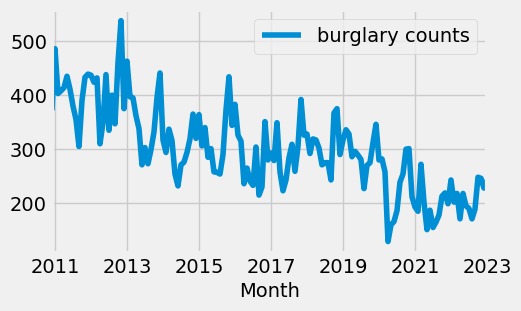

In [25]:
grouped_time.plot(kind='line',figsize=(5, 3))

<Axes: xlabel='dt_year'>

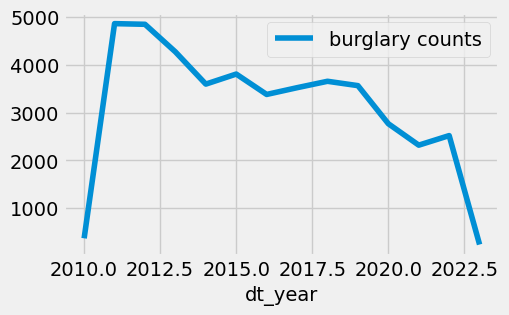

In [26]:
grouped_year.plot(kind='line',figsize=(5, 3))

<Axes: xlabel='dt_month'>

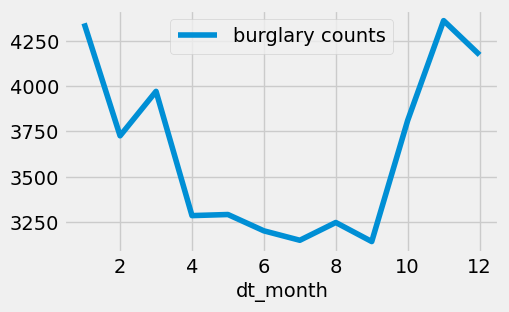

In [27]:
grouped_month.plot(kind='line',figsize=(5, 3))

In [82]:
# Perform time series decomposition
def plot_decomp(df_grouped):
    df_grouped.interpolate(inplace = True)
    df_grouped.index=df_grouped.index.to_timestamp()
    decomposition = seasonal_decompose(df_grouped["burglary counts"], model='additive')

    # Plot the decomposition
    fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(8,8))
    decomposition.observed.plot(ax=axes[0], legend=False, color='blue')
    axes[0].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1], legend=False, color='blue')
    axes[1].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2], legend=False, color='blue')
    axes[2].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[3], legend=False, color='blue')
    axes[3].set_ylabel('Residual')
    plt.tight_layout()
    return plt

In [65]:
grouped_time

,burglary counts
Month,
2010-12-01,372
2011-01-01,486
2011-02-01,403
2011-03-01,408
2011-04-01,414
...,...
2022-09-01,189
2022-10-01,248
2022-11-01,246


<module 'matplotlib.pyplot' from 'C:\\Users\\xiaoyawang\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

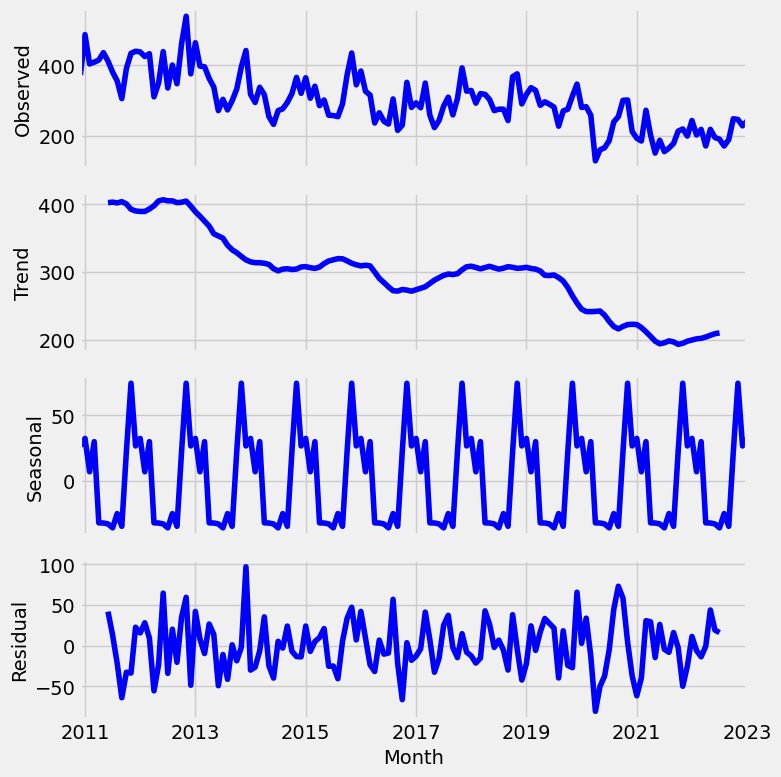

In [81]:
plot_decomp(grouped_time)

In [89]:
df_barnet_burg = df_barnet[mask]
barnet_code1 = df_barnet[df_barnet['LSOA code']=='E01000131']
grouped_code1 = barnet_code1.groupby('Month')[['Crime type']].count()
grouped_code1 = grouped_code1.rename(columns={'Crime type':'burglary counts'})


In [79]:
from datetime import datetime
def contain_all_months(df_other):
    # Create a list of dates from December 2010 to January 2023
    start_date = datetime(2010, 12,1)
    end_date = datetime(2023, 2,1)
    dates = pd.date_range(start=start_date, end=end_date, freq='M')
    year_month = dates.to_period('M')
    # Create a DataFrame with 'year' and 'month' columns
    df_dates = pd.DataFrame({'Month': year_month})
    # Perform the join based on the 'date' column
    df_merged = pd.merge(df_dates, df_other, on='Month', how='left')
    df_merged_filled = df_merged.fillna(0)
    return df_merged_filled
df_new = contain_all_months(grouped_code1)
df_new = df_new.set_index('Month')
df_new

,burglary counts
Month,
2010-12,6
2011-01,14
2011-02,7
2011-03,14
2011-04,18
...,...
2022-09,14
2022-10,16
2022-11,9


<module 'matplotlib.pyplot' from 'C:\\Users\\xiaoyawang\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

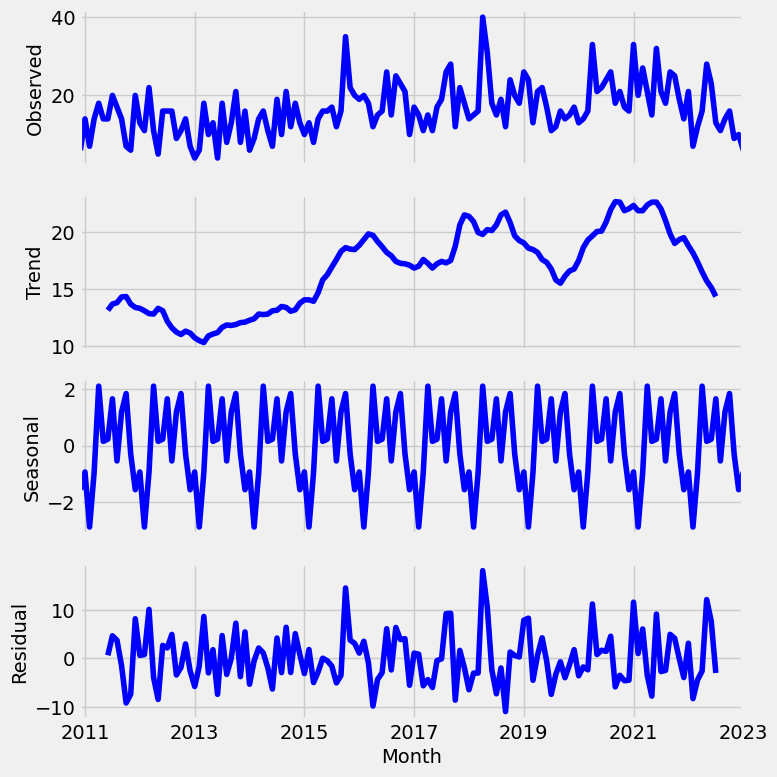

In [83]:
plot_decomp(df_new)

## Explore the relation between crime types

In [31]:
#for London
df_london = df[df['Falls within'] == 'Metropolitan Police Service']
df_london = df_london.groupby(['Month', 'LSOA name','Crime type']).size().reset_index(name='frequency')

In [32]:
london_crimes = df_london.pivot(index=['Month','LSOA name'], columns='Crime type', values='frequency')
london_crimes = london_crimes.fillna(0)

In [28]:
london_crimes

Crime type                         Anti-social behaviour  Bicycle theft  \
Month   LSOA name                                                         
2010-12 Barking and Dagenham 001A                   29.0            0.0   
        Barking and Dagenham 001B                    3.0            0.0   
        Barking and Dagenham 001C                    4.0            0.0   
        Barking and Dagenham 001D                   12.0            0.0   
        Barking and Dagenham 002A                    2.0            0.0   
...                                                  ...            ...   
2023-01 Wokingham 002A                               0.0            0.0   
        Wolverhampton 023D                           0.0            0.0   
        Worthing 006E                                0.0            0.0   
        Worthing 011C                                0.0            0.0   
        Wychavon 014C                                0.0            0.0   

Crime type                         Burglary  Criminal damage and arson  Drugs  \
Month   LSOA name                                                               
2010-12 Barking and Dagenham 001A       1.0                        0.0    0.0   
        Barking and Dagenham 001B       1.0                        0.0    0.0   
        Barking and Dagenham 001C       2.0                        0.0    0.0   
        Barking and Dagenham 001D       2.0                        0.0    0.0   
        Barking and Dagenham 002A       0.0                        0.0    0.0   
...                                     ...                        ...    ...   
2023-01 Wokingham 002A                  0.0                        0.0    0.0   
        Wolverhampton 023D              0.0                        0.0    0.0   
        Worthing 006E                   0.0                        0.0    0.0   
        Worthing 011C                   0.0                        0.0    0.0   
        Wychavon 014C                   0.0                        0.0    0.0   

Crime type                         Other crime  Other theft  \
Month   LSOA name                                             
2010-12 Barking and Dagenham 001A          8.0          0.0   
        Barking and Dagenham 001B          4.0          0.0   
        Barking and Dagenham 001C          3.0          0.0   
        Barking and Dagenham 001D         11.0          0.0   
        Barking and Dagenham 002A          2.0          0.0   
...                                        ...          ...   
2023-01 Wokingham 002A                     0.0          0.0   
        Wolverhampton 023D                 0.0          0.0   
        Worthing 006E                      0.0          0.0   
        Worthing 011C                      0.0          0.0   
        Wychavon 014C                      0.0          0.0   

Crime type                         Possession of weapons  \
Month   LSOA name                                          
2010-12 Barking and Dagenham 001A                    0.0   
        Barking and Dagenham 001B                    0.0   
        Barking and Dagenham 001C                    0.0   
        Barking and Dagenham 001D                    0.0   
        Barking and Dagenham 002A                    0.0   
...                                                  ...   
2023-01 Wokingham 002A                               0.0   
        Wolverhampton 023D                           0.0   
        Worthing 006E                                0.0   
        Worthing 011C                                0.0   
        Wychavon 014C                                0.0   

Crime type                         Public disorder and weapons  Public order  \
Month   LSOA name                                                              
2010-12 Barking and Dagenham 001A                          0.0           0.0   
        Barking and Dagenham 001B                          0.0           0.0   
        Barking and Dagenham 001C                

In [33]:
df_corr = london_crimes.corr()
df_corr['Burglary'].sort_values(ascending=False)

Crime type
Burglary                        1.000000
Other theft                     0.325771
Anti-social behaviour           0.295082
Robbery                         0.292319
Theft from the person           0.252150
Shoplifting                     0.250975
Vehicle crime                   0.234496
Bicycle theft                   0.210555
Violence and sexual offences    0.203995
Criminal damage and arson       0.194835
Public order                    0.190412
Drugs                           0.189918
Violent crime                   0.168443
Other crime                     0.135263
Public disorder and weapons     0.104842
Possession of weapons           0.088485
Name: Burglary, dtype: float64

<Axes: xlabel='Crime type', ylabel='Crime type'>

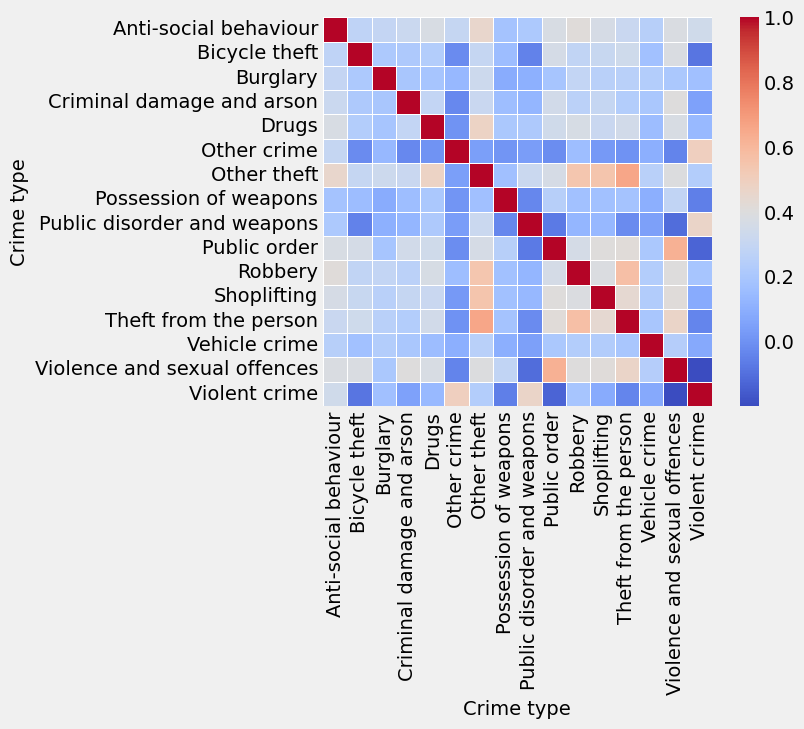

In [34]:
import seaborn as sns
sns.heatmap(df_corr, cmap='coolwarm', annot=False, fmt='.2f', square=True, linewidths=0.5)

In [35]:
#for Barnet
barnet_corr = df_barnet.groupby(['Month', 'LSOA name','Crime type']).size().reset_index(name='frequency')
barnet_corr = barnet_corr.pivot(index=['Month','LSOA name'], columns='Crime type', values='frequency')
barnet_corr = barnet_corr.fillna(0)
barnet_corr = barnet_corr.corr()
barnet_corr['Burglary'].sort_values(ascending=False)

Crime type
Burglary                        1.000000
Violent crime                   0.132973
Other theft                     0.122231
Other crime                     0.109671
Anti-social behaviour           0.106423
Robbery                         0.090232
Criminal damage and arson       0.084732
Shoplifting                     0.079726
Vehicle crime                   0.079022
Public disorder and weapons     0.066428
Drugs                           0.064188
Theft from the person           0.059104
Violence and sexual offences    0.037102
Bicycle theft                   0.034945
Public order                    0.033224
Possession of weapons           0.015599
Name: Burglary, dtype: float64

In [36]:
barnet_corr = df_barnet.groupby(['Month', 'LSOA name','Crime type']).size().reset_index(name='frequency')
barnet_corr = barnet_corr.pivot(index=['Month','LSOA name'], columns='Crime type', values='frequency')
barnet_corr = barnet_corr.fillna(0)
barnet_corr

Crime type           Anti-social behaviour  Bicycle theft  Burglary  \
Month   LSOA name                                                     
2010-12 Barnet 001A                    7.0            0.0       4.0   
        Barnet 001B                    3.0            0.0       2.0   
        Barnet 001C                    8.0            0.0       0.0   
        Barnet 001D                    2.0            0.0       3.0   
        Barnet 001E                    2.0            0.0       1.0   
...                                    ...            ...       ...   
2023-01 Barnet 040D                    2.0            0.0       1.0   
        Barnet 041A                    2.0            0.0       2.0   
        Barnet 041B                    1.0            0.0       0.0   
        Barnet 041C                    1.0            0.0       2.0   
        Barnet 041D                    3.0            0.0       2.0   

Crime type           Criminal damage and arson  Drugs  Other crime  \
Month   LSOA name                                                    
2010-12 Barnet 001A                        0.0    0.0          9.0   
        Barnet 001B                        0.0    0.0          3.0   
        Barnet 001C                        0.0    0.0          9.0   
        Barnet 001D                        0.0    0.0          1.0   
        Barnet 001E                        0.0    0.0          0.0   
...                                        ...    ...          ...   
2023-01 Barnet 040D                        0.0    0.0          0.0   
        Barnet 041A                        1.0    0.0          0.0   
        Barnet 041B                        1.0    0.0          0.0   
        Barnet 041C                        0.0    0.0          1.0   
        Barnet 041D                        0.0    0.0          0.0   

Crime type           Other theft  Possession of weapons  \
Month   LSOA name                                         
2010-12 Barnet 001A          0.0                    0.0   
        Barnet 001B          0.0                    0.0   
        Barnet 001C          0.0                    0.0   
        Barnet 001D          0.0                    0.0   
        Barnet 001E          0.0                    0.0   
...                          ...                    ...   
2023-01 Barnet 040D          1.0                    0.0   
        Barnet 041A          1.0                    0.0   
        Barnet 041B          0.0                    0.0   
        Barnet 041C          0.0                    0.0   
        Barnet 041D          2.0                    0.0   

Crime type           Public disorder and weapons  Public order  Robbery  \
Month   LSOA name                                                         
2010-12 Barnet 001A                          0.0           0.0      1.0   
        Barnet 001B                          0.0           0.0      0.0   
        Barnet 001C                          0.0           0.0      0.0   
        Barnet 001D                          0.0           0.0      0.0   
        Barnet 001E                          0.0           0.0      0.0   
...                                          ...           ...      ...   
2023-01 Barnet 040D                          0.0           0.0      0.0   
        Barnet 041A                          0.0           0.0      0.0   
        Barnet 041B                          0.0           0.0      0.0   
        Barnet 041C                          0.0           1.0      0.0   
        Barnet 041D                          0.0           1.0      0.0   

Crime type           Shoplifting  Theft from the person  Vehicle crime  \
Month   LSOA name                                                        
2010-12 Barnet 001A          0.0                    0.0            1.0   
        Barnet 001B          0.0                    0.0            0.0   
        Barnet 001C          0.0                    0.0            1.0   
        Barnet 001D          0.0                   

In [38]:
len(df_barnet['LSOA code'].unique())

211